###In this notebook we are playing with plotting complex concentration as a function of Kd. 
We are comparing known ligands and known proteins with known ranges of Kd. Complex concentration and fluorescence of the complex are assumed to be directly related, but issues and errors of fluorescence will also be addressed, for example the detection limit of our fluorimeter will be taken into account. At the very end, a model of competitive ligand binding will also be addressed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Math, Latex #Do we even need this anymore?
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###The Simple Model

$$L + P \underset{k_-1}{\stackrel{k_1}{\rightleftharpoons}} PL$$

This is a simple model of our system.

We are assuming complex concentration [LP] is proportional to complex fluorescence (in this particular assay).

We estimate/know the total Ligand $[L]_{tot} = [L] + [PL]$ and Protein $[P]_{tot} = [P] + [PL]$ concentration from the experimental setup, and presume we can measure the complex concentration in some way $[PL]$.

$$K_{d} = \frac{[L][P]}{[PL]}$$

From this relation can calculate $K_d$ from these three values.

###Let's take a hypothetical case where $K_d$ = 2 nM. (2e-9 M)

What binding curve would we expect?

In [2]:
Kd = 2e-9 # M

The protein concentration for our assay will be 1 nM (half of the Kd).

In [3]:
Ptot = 1e-9 # M

The ligand concentration will be a 12-point half-log dilution from 20 uM ligand (down to ~60 pM).

In [9]:
Ltot = 20.0e-6 / np.array([10**(float(i)/2.0) for i in range(12)]) # M

To calculate $[PL]$ as a function of $[P]_{tot}$, $[L]_{tot}$, and $K_d$, we start with

$$[PL] = \frac{[L][P]}{K_{d} }$$

Then we need to put L and P in terms of $[L]_{tot}$ and $[P]_{tot}$, using

$$[L] = [L]_{tot}-[PL]$$

$$[P] = [P]_{tot}-[PL]$$

This gives us:

$$[PL] = \frac{([L]_{tot}-[PL])([P]_{tot}-[PL])}{K_{d} }$$

Rearranging to form a quadratic equations, we get:

$$0 = [PL]^2 - [PL]([P]_{tot}+[L]_{tot}+K_{d}) + [P]_{tot} [L]_{tot}$$

Using the solution for the quadratic equation:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

where $x = [PL]$, $a = 1$, $b = -([P]_{tot}+[L]_{tot}+K_d)$, and $c = [P]_{tot} [L]_{tot}$. We get as the only reasonable solution:

$$[PL] = \frac{([P]_{tot} + [L]_{tot} + K_{d}) - \sqrt{([P]_{tot} + [L]_{tot} + K_{d})^2 - 4[P]_{tot}[L]_{tot}}}{2}$$ 

In [11]:
# Now we can use this to define a function that gives us PL from Kd, Ptot, and Ltot.
def two_component_binding(Kd, Ptot, Ltot):
    """
    Parameters
    ----------
    Kd : float
        Dissociation constant
    Ptot : float
        Total protein concentration
    Ltot : float
        Total ligand concentration
        
    Returns
    -------
    P : float
        Free protein concentration
    L : float
        Free ligand concentration
    PL : float
        Complex concentration
    """
                                    
    PL = 0.5 * ((Ptot + Ltot + Kd) - np.sqrt((Ptot + Ltot + Kd)**2 - 4*Ptot*Ltot))  # complex concentration (uM)
    P = Ptot - PL; # free protein concentration in sample cell after n injections (uM)                                                                                                                                                                                                                          
    L = Ltot - PL; # free ligand concentration in sample cell after n injections (uM)                                                                                                                                                                                                                           
    return [P, L, PL]

In [12]:
[L, P, PL] = two_component_binding(Kd, Ptot, Ltot)

In [13]:
print Ltot

[  2.00000000e-05   6.32455532e-06   2.00000000e-06   6.32455532e-07
   2.00000000e-07   6.32455532e-08   2.00000000e-08   6.32455532e-09
   2.00000000e-09   6.32455532e-10   2.00000000e-10   6.32455532e-11]


In [14]:
print PL

[  9.99900005e-10   9.99683822e-10   9.99000500e-10   9.96842730e-10
   9.90050244e-10   9.68884511e-10   9.05189950e-10   7.36430279e-10
   4.38447187e-10   1.83368995e-10   6.37708504e-11   2.07876510e-11]


###Now we can plot our complex concentration as a function of our ligand concentration!

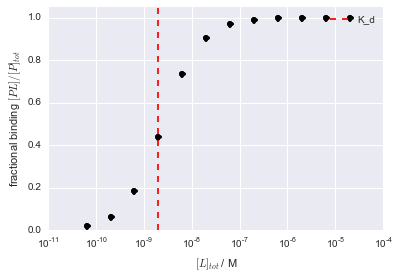

In [58]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot, PL / Ptot, 'ko')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('fractional binding $[PL] / [P]_{tot}$')
plt.ylim(0, 1.05)
plt.axvline(Kd,color='r',linestyle='--',label='K_d')
plt.legend();

Okay, so now lets do something a little more fun.

### Let's overlap the curves we get for different amounts of protein in the assay.

In [59]:
[L2, P2, PL2] = two_component_binding(Kd, Ptot/2, Ltot)
[L3, P3, PL3] = two_component_binding(Kd, Ptot*2, Ltot)

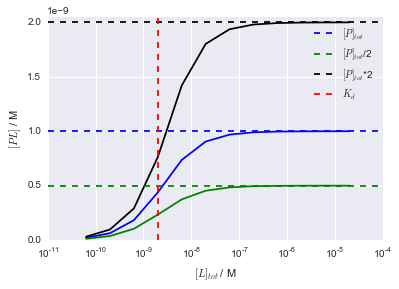

In [60]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,PL,'b',Ltot,PL2,'g',Ltot,PL3,'k')
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$ / M')
plt.ylim(0,2.05e-9)
plt.axhline(Ptot,color='b',linestyle='--',label='$[P]_{tot}$')
plt.axhline(Ptot/2,color='g',linestyle='--',label='$[P]_{tot}$/2')
plt.axhline(Ptot*2,color='k',linestyle='--', label='$[P]_{tot}$*2')
plt.axvline(Kd,color='r',linestyle='--',label='$K_d$')
plt.legend();

###Let's do even more fun things!

Say we have one molecule that has a different Kd for a bunch of proteins. We'll keep the protein concentration the same, but look at how our complex concentration changes as a function of Kd.

In [61]:
[L4, P4, PL4] = two_component_binding(Kd/10, Ptot, Ltot)
[L5, P5, PL5] = two_component_binding(Kd*10, Ptot, Ltot)

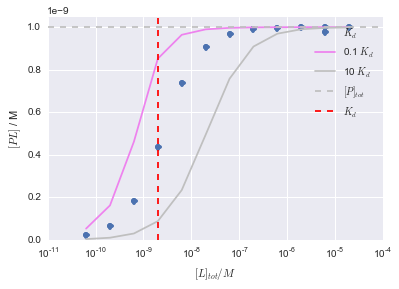

In [63]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,PL,'o',label='$K_d$');
plt.semilogx(Ltot,PL4,'violet',label='0.1 $K_d$');
plt.semilogx(Ltot,PL5,'.75',label='10 $K_d$')
plt.xlabel('$[L]_{tot} / M$')
plt.ylabel('$[PL]$ / M')
plt.ylim(0,1.05e-9)
plt.axhline(Ptot,color='0.75',linestyle='--',label='$[P]_{tot}$')
#plt.axvline(Kd/10,color='violet',label='Kd/10')
#plt.axvline(Kd*10,color='.75',label='Kd*10')
plt.axvline(Kd,color='r',linestyle='--',label='$K_d$')
plt.legend();

###Now let's make this new plot for 'simulated model of dilution series experiment' figure

In [64]:
# Let's plot Kd's ranging from 1mM to 10pM
Kd_max = 1e-3 # M

In [65]:
[La, Pa, PLa] = two_component_binding(Kd_max, Ptot, Ltot)
[Lb, Pb, PLb] = two_component_binding(Kd_max/10, Ptot, Ltot)
[Lc, Pc, PLc] = two_component_binding(Kd_max/100, Ptot, Ltot)
[Ld, Pd, PLd] = two_component_binding(Kd_max/1e3, Ptot, Ltot)
[Le, Pe, PLe] = two_component_binding(Kd_max/1e4, Ptot, Ltot)
[Lf, Pf, PLf] = two_component_binding(Kd_max/1e5, Ptot, Ltot)
[Lg, Pg, PLg] = two_component_binding(Kd_max/1e6, Ptot, Ltot)
[Lh, Ph, PLh] = two_component_binding(Kd_max/1e7, Ptot, Ltot)
[Li, Pi, PLi] = two_component_binding(Kd_max/1e8, Ptot, Ltot)
[Lj, Pj, PLj] = two_component_binding(Kd_max/1e9, Ptot, Ltot)

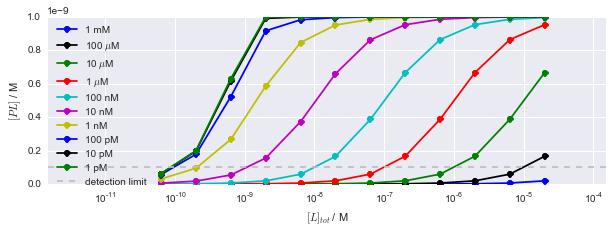

In [75]:
# y will be complex concentration
# x will be total ligand concentration
plt.figure(figsize=(10,3))
plt.semilogx(Ltot,PLa,'-bo',label='1 mM');
plt.semilogx(Ltot,PLb,'-ko',label='100 $\mu$M');
plt.semilogx(Ltot,PLc,'-go',label='10 $\mu$M');
plt.semilogx(Ltot,PLd,'-ro',label='1 $\mu$M');
plt.semilogx(Ltot,PLe,'-co',label='100 nM');
plt.semilogx(Ltot,PLf,'-mo',label='10 nM');
plt.semilogx(Ltot,PLg,'-yo',label='1 nM');
plt.semilogx(Ltot,PLh,'-bo',label='100 pM');
plt.semilogx(Ltot,PLi,'-ko',label='10 pM');
plt.semilogx(Ltot,PLj,'-go',label='1 pM');
plt.xlabel('$[L]_{tot}$ / M')
plt.ylabel('$[PL]$ / M')
plt.xlim(1.5e-12,1.5e-4)
plt.axhline(0.1e-9,color='0.75',linestyle='--',label='detection limit');
plt.legend(loc=0);

###Okay! Now let's do some stuff with kinases!

We're going to pick 10 kinases and look at what binding curves we would expect to the fluorescent inhibitor bosutinib.
Info from: http://www.guidetopharmacology.org/GRAC/LigandDisplayForward?tab=screens&ligandId=5710
Specifically: http://www.guidetopharmacology.org/GRAC/LigandScreenDisplayForward?ligandId=5710&screenId=2

####Again units in nM. Abl1 value is for nonphosphorylated form. Others don't seem to specify?

In [67]:
Kd_Src = 1.0e-9 # M
Kd_Abl = 0.12e-9 # M
Kd_Abl_T315I = 21.0e-9 # M
Kd_p38 = 3000.0e-9 # M 
Kd_Aur = 3000.0e-9 # M
Kd_CK2 = 3000.0e-9 # M
Kd_SYK = 290.0e-9 # M
Kd_DDR = 120.0e-9 # M
Kd_MEK = 19.0e-9 # M

#This CK2, Aur, and p38 value is actually 'greater than'.

####We'll use the same Ltot and Ptot as before.

In [68]:
[L6, P6, PL6] = two_component_binding(Kd_Src, Ptot, Ltot)
[L7, P7, PL7] = two_component_binding(Kd_Abl, Ptot, Ltot)
[L8, P8, PL8] = two_component_binding(Kd_Abl_T315I, Ptot, Ltot)
[L9, P9, PL9] = two_component_binding(Kd_p38, Ptot, Ltot)

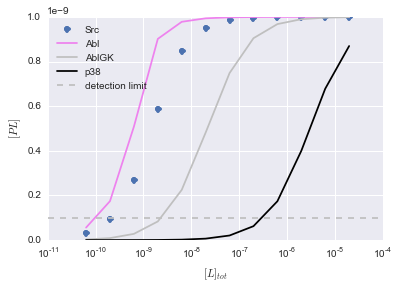

In [74]:
# y will be complex concentration
# x will be total ligand concentration
Src, = plt.semilogx(Ltot,PL6,'o', label='Src')
Abl, = plt.semilogx(Ltot,PL7,'violet', label = 'Abl')
AblGK, = plt.semilogx(Ltot,PL8,'.75', label = 'AblGK')
p38, = plt.semilogx(Ltot,PL9,'k', label = 'p38')
plt.axhline(0.1e-9,color='0.75',linestyle='--', label='detection limit');
plt.xlabel('$[L]_{tot}$')
plt.ylabel('$[PL]$')
#plt.legend(handles=[Src, Abl, AblGK, p38], loc =0);
plt.legend(loc=0);

#### Okay, this is all great! In theory we can use this with whatever protein-ligand combination we want!

### But in practice there are limitations!

 - Experimental error
 - We want to limit the amount of protein used
 - The ligand also fluoresces.
 - The inner filter effect
 - The Fluorescence detection has a detection limit.

#### How do these limit the Kd, kinase, inhibitor, and the concentrations of kinase and inhibitor we can effectively access in our experimental design?